# **Makeover Monday**

###### John Andrew Dixon

## **The Original**

[_**Original Dataset**_](https://data.world/makeovermonday/2021w36)

_**Original Data Visualization**_

![Linechart showing Abortion Support 2021](https://content.gallup.com/origin/gallupinc/GallupSpaces/Production/Cms/POLL/lxocbk8vnu-ls9p2n5ae-a.png "Abortion Support 2021")

## **The Makeover**

### **Data Loading**

In [6]:
# Import the necessary Python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
# Load the data and verify
df = pd.read_excel('../../Coding Dojo/Datasets/Abortion Support 2021.xlsx')
df.head()

,Poll Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
0,2021 May 3-18,0.32,0.48,0.19,0.02
1,2020 May 1-13,0.29,0.50,0.20,0.02
2,2019 May 1-12,0.25,0.53,0.21,0.02
3,2018 May 1-10,0.29,0.50,0.18,0.02
4,2017 May 3-7,0.29,0.50,0.18,0.03


### **Data Cleaning**

In [8]:
# Remove the later day of the month so we can parse it into a datetime
df['Poll Date'] = pd.to_datetime(df['Poll Date'].str.split('-').str[0], format='%Y %b %d')

# Verify
df

,Poll Date,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
0,2021-05-03,0.32,0.48,0.19,0.02
1,2020-05-01,0.29,0.50,0.20,0.02
2,2019-05-01,0.25,0.53,0.21,0.02
3,2018-05-01,0.29,0.50,0.18,0.02
4,2017-05-03,0.29,0.50,0.18,0.03
...,...,...,...,...,...
58,1981-05-08,0.23,0.52,0.21,0.04
59,1980-07-11,0.25,0.53,0.18,0.04
60,1979-02-23,0.22,0.54,0.19,0.05
61,1977-12-09,0.22,0.55,0.19,0.04


### **Plot Creation**

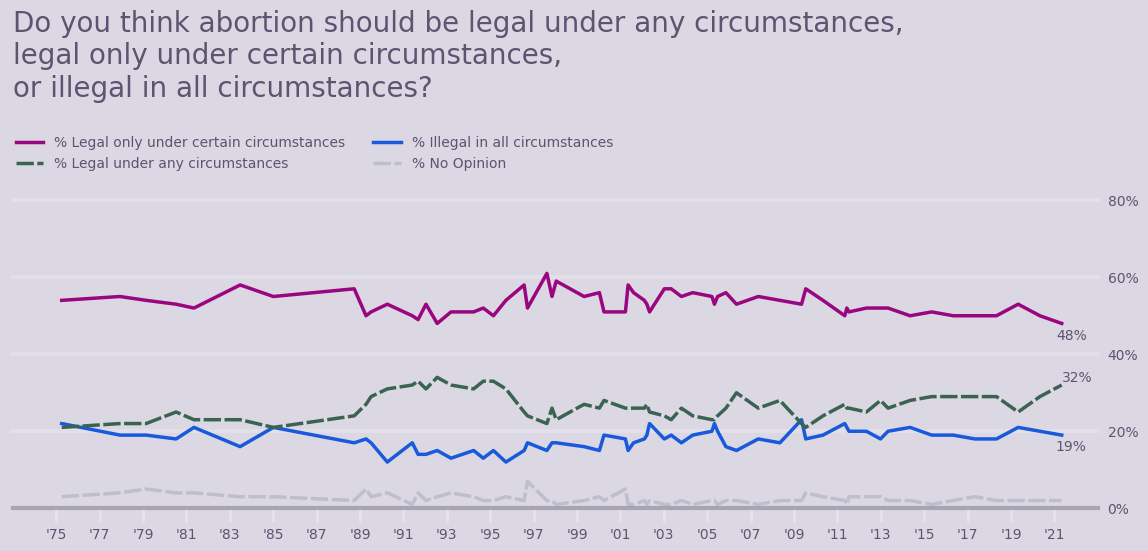

In [14]:
# Create a new figure. Assign to it a specific size. Change its (not the plot's) background color.
fig = plt.figure(figsize=(14, 4), facecolor='#DBD8E3')

# Get the axes of the figure object above.
ax = plt.axes()

# Set the background color of the plot. Remove all spines.
ax.set_facecolor('#DBD8E3')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Change the color of the bottom spine. Made its linewidth thicker.
ax.spines['bottom'].set_color('#352F4455')
ax.spines['bottom'].set_linewidth(3)

# Add a title to the plot. Add padding to the bottom of the title. Make it float left. Add color and change fontsize.
plt.title('Do you think abortion should be legal under any circumstances,\nlegal only under certain circumstances,\nor illegal in all circumstances?', 
          pad=75,
          loc='left',
          color='#5C5470',
          fontsize=20)


# Create all four different plots with Seaborn.
sns.lineplot(data=df, x='Poll Date', y='No opinion %', label='% No Opinion', color='#6B728E', linestyle=(0, (5, 1)), linewidth=2.5, alpha=0.25)
sns.lineplot(data=df, x='Poll Date', y='Illegal in all %', label='% Illegal in all circumstances', color='#185ADB', linewidth=2.5)
sns.lineplot(data=df, x='Poll Date', y='Legal under any %', label='% Legal under any circumstances', color='#3A6351', linestyle=(0, (5, 1)), linewidth=2.5)
sns.lineplot(data=df, x='Poll Date', y='Legal only under certain %', label='% Legal only under certain circumstances', color='#9A0680', linewidth=2.5)


# Create and format a legend. Make it have two columns. Add location paraments and reverse order of labels.
plt.legend(ncols=2,
           frameon=False,
           loc='upper left', 
           bbox_to_anchor=(-0.009, 1.25),
           labelcolor='#5C5470',
           reverse=True)


# Remove y-axis labels.
plt.ylabel(None)
# Add lower and upper limits.
plt.ylim(0, 0.8)
#  Specify that only the ticks 0 through 0.80 show up, counting up by 0.2. Format them as percentages
plt.yticks(ticks=[0, 0.20, 0.40, 0.60, 0.80], 
           labels=['0%', '20%', '40%', '60%', '80%'],
           color='#5C5470')

# Make the y-axis ticks go on the right-side, remove them from showing
plt.tick_params(axis='y', 
                right=False, 
                left=False, 
                labelright=True, 
                labelleft=False)

# Modify the look of the x-ticks.
plt.tick_params(axis='x',
                width='2',
                length=10,
                color='#FFFFFF44');


# Remove the x-axis label.
plt.xlabel(None)
# Set the earliest value on the x-axis as January 1st, 1973
earliest = pd.Timestamp(1973, 1, 1)
# Set the latest value on the x-axis as January 1st, 2023
latest = pd.Timestamp(2023, 1, 1)
# Apply the x-axis limits
plt.xlim(earliest, latest)
# Make ticks appear from 1975 to 2021. Format them so only the last two numbers appear with a comma in front.
plt.xticks(ticks=[pd.Timestamp(x, 1, 1) for x in range(1975, 2022, 2)], 
           labels=[f'\'{str(x)[-2:]}' for x in range(1975, 2022, 2)],
           color='#5C5470');

# Apply the grid lines as specified
# clip_on=False helps prevent the top most gridline from being cutoff
# If off, it's width wont match all the other gridlines
plt.grid(axis='y', 
         color='#FFFFFF', 
         alpha=0.2, 
         clip_on=False, 
         linewidth=3)
         
# Add the percentages per trendline for the year this was taken (2021)
plt.text(s=f'{round(df["Legal only under certain %"][0] * 100)}%', x=pd.Timestamp(2021, 1, 28), y=0.44, color='#5C5470')
plt.text(s=f'{round(df["Legal under any %"][0] * 100)}%', x=pd.Timestamp(2021, 5, 1), y=0.33, color='#5C5470')
plt.text(s=f'{round(df["Illegal in all %"][0] * 100)}%', x=pd.Timestamp(2021, 1, 20), y=0.15, color='#5C5470');